# 데이터 전처리 및 데이터 분석

- 주어진 뉴스데이터에 대한 데이터 분석을 진행합니다.
- 뉴스 카테고리 분류를 위한 train과 test파일을 생성합니다.
    
카테고리 이름 | Label 번호
--- | ---
IT/과학 |    0
경제   |    1
문화  |     2
미용/건강  | 3
사회     |  4
생활     | 5
스포츠   |  6
연예     |  7
정치     |  8
    

- 생성되는 파일의 형태는 다음과 같습니다. 위의 표를 참고하여 카테고리 이름을 전부 숫자형태로 변환합니다.

    ```
    뉴스 문장 또는 문장들\t뉴스 카테고리(한글이 아닌 숫자)
    예) 어제 코로나 확진자 수는 000명입니다 ... 어제보다 00명 감소했습니다\t0
    ```



In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/PBL_0115'

Mounted at /content/drive


In [2]:
import os
import pandas as pd

In [3]:
train_df = pd.read_csv(os.path.join(path, 'news_train.csv'), sep='\t', encoding='utf-8', index_col=0)
test_df = pd.read_csv(os.path.join(path, 'news_test.csv'), sep='\t', encoding='utf-8', index_col=0)

In [4]:
print(train_df.shape)
print(train_df.columns)
print(train_df.head())

(5000, 5)
Index(['filename', 'date', 'NewsPaper', 'Topic', 'News'], dtype='object')
            filename  ...                                               News
52    NLRW1900000022  ...  <p> 공공 SW사업 불공정 하도급 관행 개선되나 </p> <p> 공공 소프트웨어(...
3529  NWRW1900000016  ...  <p> 밀레, 고탄성 소재로 발이 편안… 엠리밋, 천연 방충성분 넣은 봄재킷 </p...
6016  NLRW1900000021  ...  <p> <경마코너> 새해 고객 환급률 73%로 </p> <p> 2009년 과천 서울...
8046  NLRW1900000021  ...  <p> 도의회 예결특위 선정 ‘잡음’ </p> <p> 경기도의회가 7대 마지막 예산...
1109  NLRW1900000062  ...  <p> 한국지엠·부품 협력업체 ‘상생’ 강화 </p> <p> ‘경영 현황 설명회’ ...

[5 rows x 5 columns]


## 뉴스기사 분야와 언론사 확인하기
- pandas dataframe의 grouby를 활용합니다
- groupby 함수를 사용해서 `Topic`마다 몇개의 기사가 존재하는지 확인합니다.
- groupby 함수를 사용해서 `Newspaper`마다 몇개의 기사가 존재하는지 확인합니다.

In [7]:
len(train_df.groupby(train_df['Topic']))

9

In [9]:
len(train_df.groupby(train_df['NewsPaper']))

17

## 전처리
- 수업시간에 배운 `preprocess_sent 함수`를 활용하여 자유롭게 전처리 와 형태소 분석 코드를 작성합니다.
- 전처리 함수의 input과 output은 다음과 같습니다.
  - input: 전처리 안 된 문장
  - output: 전처리가 완료된 문장으로 `띄어쓰기(' ')`로 구분합니다

### (참고) 뉴스기사의 문장 분리
- 아래 `load_sentences 함수`를 변형해서 문장분리를 할 수 있다.


In [11]:
def load_sentences(news):
    """
    개별 뉴스에서 </p>와 <p>로 구분되어 있는 여러 문장을 문장으로 쪼갬
    :param df: 전처리 대상 데이터 프레임
    :return: 문장이 분리된 데이터 프레임
    """
    sentences_in_news = news.split(' </p> <p> ')
    sentences_in_news = [x.replace('</p>', '').replace('<p>','').strip() for x in sentences_in_news]

    return sentences_in_news

- 뉴스기사의 첫 3문장을 활용한다. 
- TODO: test dataframe에 대해 같은 내용을 진행한다.

In [12]:
train_df['all_sents'] = train_df['News'].apply(lambda x: ' '.join(load_sentences(x)[:3]))
test_df['all_sents'] = test_df['News'].apply(lambda x: ' '.join(load_sentences(x)[:3]))

In [13]:
train_df.head()

,filename,date,NewsPaper,Topic,News,all_sents
52,NLRW1900000022,20101209,경기일보,IT/과학,<p> 공공 SW사업 불공정 하도급 관행 개선되나 </p> <p> 공공 소프트웨어(...,공공 SW사업 불공정 하도급 관행 개선되나 공공 소프트웨어(SW)사업 수주시 제안서...
3529,NWRW1900000016,20140416,동아일보사,미용/건강,"<p> 밀레, 고탄성 소재로 발이 편안… 엠리밋, 천연 방충성분 넣은 봄재킷 </p...","밀레, 고탄성 소재로 발이 편안… 엠리밋, 천연 방충성분 넣은 봄재킷 이제 아웃도어..."
6016,NLRW1900000021,20090116,경기일보,스포츠,<p> <경마코너> 새해 고객 환급률 73%로 </p> <p> 2009년 과천 서울...,<경마코너> 새해 고객 환급률 73%로 2009년 과천 서울경마공원에서 펼쳐지는 경...
8046,NLRW1900000021,20090826,경기일보,정치,<p> 도의회 예결특위 선정 ‘잡음’ </p> <p> 경기도의회가 7대 마지막 예산...,도의회 예결특위 선정 ‘잡음’ 경기도의회가 7대 마지막 예산결산특별위원회 위원 선정...
1109,NLRW1900000062,20180516,경인일보,경제,<p> 한국지엠·부품 협력업체 ‘상생’ 강화 </p> <p> ‘경영 현황 설명회’ ...,한국지엠·부품 협력업체 ‘상생’ 강화 ‘경영 현황 설명회’ 370여명 참석 카젬 사...


In [14]:
import re

# 예시
def preprocess_sent(original_sent):
  preprocessed_sent = re.sub("[^가-힣0-9a-zA-Z\\s]", " ", original_sent)
  return preprocessed_sent

In [15]:
train_df['preprocessed_sent'] = train_df['all_sents'].apply(lambda x: preprocess_sent(x))
test_df['preprocessed_sent'] = test_df['all_sents'].apply(lambda x: preprocess_sent(x))

## DataFrame에서 필요한 column만 남기기

In [16]:
# train_df = train_df[['Topic','preprocessed_sent']]
# test_df = test_df[['Topic','preprocessed_sent']]

# train_df.head()

## 뉴스별 문장 길이 확인하기

- 문장 길이에 대한 분포를 확인합니다.
- dataframe에 새로운 column을 추가합니다. column이름은 `num_tokens` 입니다. 
- 띄어쓰기로 구분된(전처리가 완료된) 문장의 token수를 count합니다.

In [53]:
train_df['num_tokens'] = train_df['preprocessed_sent'].apply(lambda x: len(x.split(' ')))
train_df.head()

,filename,date,NewsPaper,Topic,News,all_sents,preprocessed_sent,num_tokens
52,NLRW1900000022,20101209,경기일보,IT/과학,<p> 공공 SW사업 불공정 하도급 관행 개선되나 </p> <p> 공공 소프트웨어(...,공공 SW사업 불공정 하도급 관행 개선되나 공공 소프트웨어(SW)사업 수주시 제안서...,공공 SW사업 불공정 하도급 관행 개선되나 공공 소프트웨어 SW 사업 수주시 제안서...,52
3529,NWRW1900000016,20140416,동아일보사,미용/건강,"<p> 밀레, 고탄성 소재로 발이 편안… 엠리밋, 천연 방충성분 넣은 봄재킷 </p...","밀레, 고탄성 소재로 발이 편안… 엠리밋, 천연 방충성분 넣은 봄재킷 이제 아웃도어...",밀레 고탄성 소재로 발이 편안 엠리밋 천연 방충성분 넣은 봄재킷 이제 아웃도어...,140
6016,NLRW1900000021,20090116,경기일보,스포츠,<p> <경마코너> 새해 고객 환급률 73%로 </p> <p> 2009년 과천 서울...,<경마코너> 새해 고객 환급률 73%로 2009년 과천 서울경마공원에서 펼쳐지는 경...,경마코너 새해 고객 환급률 73 로 2009년 과천 서울경마공원에서 펼쳐지는 경...,43
8046,NLRW1900000021,20090826,경기일보,정치,<p> 도의회 예결특위 선정 ‘잡음’ </p> <p> 경기도의회가 7대 마지막 예산...,도의회 예결특위 선정 ‘잡음’ 경기도의회가 7대 마지막 예산결산특별위원회 위원 선정...,도의회 예결특위 선정 잡음 경기도의회가 7대 마지막 예산결산특별위원회 위원 선정...,43
1109,NLRW1900000062,20180516,경인일보,경제,<p> 한국지엠·부품 협력업체 ‘상생’ 강화 </p> <p> ‘경영 현황 설명회’ ...,한국지엠·부품 협력업체 ‘상생’ 강화 ‘경영 현황 설명회’ 370여명 참석 카젬 사...,한국지엠 부품 협력업체 상생 강화 경영 현황 설명회 370여명 참석 카젬 사...,21


제목의 최대 길이 :  326
제목의 평균 길이 :  65.393


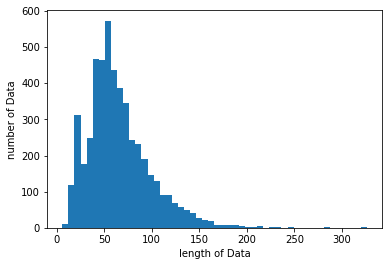

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

print("제목의 최대 길이 : ", max(l for l in train_df['num_tokens']))
print("제목의 평균 길이 : ", train_df['num_tokens'].mean()) 
plt.hist([l for l in train_df['num_tokens']], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

## 카테고리별 문장 길이 평균, 표준편차 구하기

- Topic별 문장 길이 평균, 표준편차를 구하는데 'num_token' column을 활용하고, pandas의 mean과 std도 함께 사용합니다

In [56]:
train_df.groupby('Topic')['num_tokens'].mean()

Topic
IT/과학    66.074468
경제       62.576512
문화       66.936396
미용/건강    66.407407
사회       66.381387
생활       65.630742
스포츠      59.708408
연예       65.115242
정치       69.922642
Name: num_tokens, dtype: float64

In [57]:
train_df.groupby('Topic')['num_tokens'].std()

Topic
IT/과학    31.420510
경제       29.408464
문화       36.967139
미용/건강    32.476545
사회       34.205564
생활       33.890292
스포츠      28.157757
연예       32.088764
정치       37.794785
Name: num_tokens, dtype: float64

## 각 카테고리별 키워드 분석하기
- 분야마다 가장 많이 등장하는 키워드 10개를 추출합니다

In [58]:
from tqdm import tqdm
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

def get_keywords(df, num_keywords=10, tokenizer=None):
    grouped = df.groupby('Topic')['all_sents']
    
    keyword_dict = dict()
    for group_idx in test_df['Topic'].unique():
        each_dict = dict()
        all_news = grouped.get_group(group_idx).values

        if tokenizer is not None:
          corpus = [' '.join(tokenizer.morphs(x)) for x in all_news]
        else:
          corpus = all_news
                        
        # Get TF-IDF Score
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(corpus)
        each_dict['num_sents'] = X.shape[0]
        each_dict['num_vocabs'] = X.shape[1]
        
        topn = pd.DataFrame(X.toarray()).sum(axis=0).sort_values(ascending=False).head(num_keywords).index
        
        each_dict['keywords'] = [vectorizer.get_feature_names()[x] for x in topn]
        keyword_dict[group_idx] = each_dict

    return keyword_dict

In [59]:
keyword_info = get_keywords(test_df)

In [60]:
for keyword in keyword_info:
    print(keyword)
    print(keyword_info[keyword])
    print("\n")

IT/과학
{'num_sents': 51, 'num_vocabs': 2058, 'keywords': ['있다', '밝혔다', '있는', '것으로', '스마트폰', 'it', '국내', 'project', '통해', 'kt']}


정치
{'num_sents': 57, 'num_vocabs': 2423, 'keywords': ['있다', '박근혜', '지난', '대한', '안철수', '홍준표', '지지율', '것으로', '문재인', '이날']}


사회
{'num_sents': 67, 'num_vocabs': 2562, 'keywords': ['있다', '있는', '지난', '것으로', '대한', '밝혔다', '가운데', '위해', '포스코', '통해']}


스포츠
{'num_sents': 58, 'num_vocabs': 2178, 'keywords': ['있다', '시즌', '위해', '선수', '밝혔다', '우승', '있는', '서울', '마지막', '지난']}


미용/건강
{'num_sents': 63, 'num_vocabs': 2629, 'keywords': ['있다', '있는', '치료', '화장품', '공항', '것으로', '의약품', '특히', '한다', '최근']}


생활
{'num_sents': 53, 'num_vocabs': 2462, 'keywords': ['있다', '있는', '부산', '밝혔다', '인천', 'bmw', '중국', '위해', '가운데', '따르면']}


경제
{'num_sents': 50, 'num_vocabs': 1948, 'keywords': ['있다', '대한', '것으로', '회장', '있는', '따르면', '지역', '위해', '국내', '지분']}


문화
{'num_sents': 56, 'num_vocabs': 2207, 'keywords': ['영화', '한국', '뮤지컬', '있는', '있다', '영감은', '작가', '대전', '이번', '번개맨']}


연예
{'num_sents': 45, 'nu

## Topic의 Label을 숫자로 변경하기
- 방법은 크게 2가지가 있습니다. 

  1. pandas의 map을 활용하는 방법
  2. sklearn의 LabelEncoder를 활용하는 방법([참고 링크](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html))

In [61]:
label_dict = {'IT/과학': 0, '경제': 1, '문화': 2, '미용/건강': 3, '사회': 4, '생활': 5, '스포츠': 6, '연예': 7, '정치': 8}

In [62]:
train_df['label_encoded'] = train_df['Topic'].map(label_dict)
test_df['label_encoded'] = test_df['Topic'].map(label_dict)
train_df.head()

,filename,date,NewsPaper,Topic,News,all_sents,preprocessed_sent,num_tokens,label_encoded
52,NLRW1900000022,20101209,경기일보,IT/과학,<p> 공공 SW사업 불공정 하도급 관행 개선되나 </p> <p> 공공 소프트웨어(...,공공 SW사업 불공정 하도급 관행 개선되나 공공 소프트웨어(SW)사업 수주시 제안서...,공공 SW사업 불공정 하도급 관행 개선되나 공공 소프트웨어 SW 사업 수주시 제안서...,52,0
3529,NWRW1900000016,20140416,동아일보사,미용/건강,"<p> 밀레, 고탄성 소재로 발이 편안… 엠리밋, 천연 방충성분 넣은 봄재킷 </p...","밀레, 고탄성 소재로 발이 편안… 엠리밋, 천연 방충성분 넣은 봄재킷 이제 아웃도어...",밀레 고탄성 소재로 발이 편안 엠리밋 천연 방충성분 넣은 봄재킷 이제 아웃도어...,140,3
6016,NLRW1900000021,20090116,경기일보,스포츠,<p> <경마코너> 새해 고객 환급률 73%로 </p> <p> 2009년 과천 서울...,<경마코너> 새해 고객 환급률 73%로 2009년 과천 서울경마공원에서 펼쳐지는 경...,경마코너 새해 고객 환급률 73 로 2009년 과천 서울경마공원에서 펼쳐지는 경...,43,6
8046,NLRW1900000021,20090826,경기일보,정치,<p> 도의회 예결특위 선정 ‘잡음’ </p> <p> 경기도의회가 7대 마지막 예산...,도의회 예결특위 선정 ‘잡음’ 경기도의회가 7대 마지막 예산결산특별위원회 위원 선정...,도의회 예결특위 선정 잡음 경기도의회가 7대 마지막 예산결산특별위원회 위원 선정...,43,8
1109,NLRW1900000062,20180516,경인일보,경제,<p> 한국지엠·부품 협력업체 ‘상생’ 강화 </p> <p> ‘경영 현황 설명회’ ...,한국지엠·부품 협력업체 ‘상생’ 강화 ‘경영 현황 설명회’ 370여명 참석 카젬 사...,한국지엠 부품 협력업체 상생 강화 경영 현황 설명회 370여명 참석 카젬 사...,21,1


In [63]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
train_df['Topic'] = label.fit_transform(train_df['Topic'])

## 최종 train과 test 파일 저장하기

In [64]:
train_df[['preprocessed_sent','label_encoded']].to_csv(os.path.join(path, 'news_classification_train.csv'), sep='\t', encoding='utf-8')

In [65]:
test_df[['preprocessed_sent','label_encoded']].to_csv(os.path.join(path, 'news_classification_test.csv'), sep='\t', encoding='utf-8')